
# Part 1
Calculate the Bollinger Band for

    the month moving average of its Adjusted Closing price for AAPL

##  Import the libraries¶


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##  Load the data into a DataFrame

Here I am using pandas.read_csv(...) to read in a csv file into a pandas DataFrame

filepath_or_buffer

    the file being read in

index_col

    the column of the csv file we want to use as the index of our DataFrame

parse_dates

    instruct the read_csv function to convert anything that looks like a date into a python date



In [3]:
df = pd.read_csv(filepath_or_buffer='../data/AAPL.csv', 
                 index_col='Date', 
                 parse_dates=True)
df2 = df.iloc[::-1]
df2.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0



## Check what has been imported into the DataFrame

    Have a quick look at what we have read in
    No right or wrong way to do this
    Depends on your style, personal preferences, type of data being read in etc
    A few examples

        df.tail() df.head() df.describe()

IMPORTANT

    When working with DataFrames that have Dates as an index, make sure the date values are sorted in an ascending manner



In [5]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0



## Calculate the Bollinger Bands for the Adj. Close

    - Middle Band = Monthly moving average
    - Upper Band = Monthly moving average + (Monthly standard deviation of price x 2)
    - Lower Band = Monthly moving average - (Monthly standard deviation of price x 2)



In [4]:
# 21 days is a good approximation of a single month
df2['30d mavg'] = df2['AdjClose'].rolling(window=21).mean()
df2['30d std'] = df2['AdjClose'].rolling(window=21).std()
df2['Upper Band'] = df2['30d mavg'] + (df2['30d std'] * 2)
df2['Lower Band'] = df2['30d mavg'] - (df2['30d std'] * 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta


## Plot the results

Use the matplot lib defaults

A plot of the entire series of value

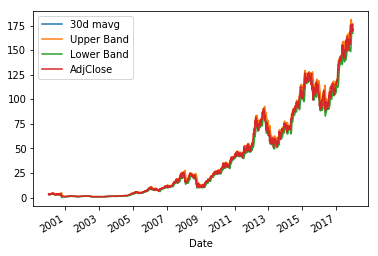

In [5]:
# create a list of the column names we are interested in plotting
cols = ['30d mavg','Upper Band','Lower Band', 'AdjClose']
df2[cols].plot()


## Plot the results

    of all data from the start of 2016 to the end of the series

Here use Slice from '2016 to the end


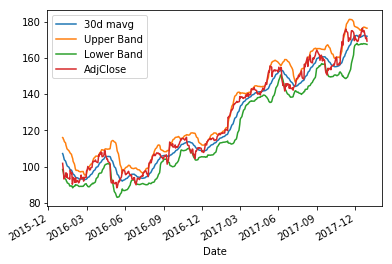

In [6]:
df2['2016':][cols].plot()


# Part 2
Improve the presentation of the chart

Here I am

    'shading' in the regions between the upper and lower bands
    adding a title, a legend and some labels

The important parts of the python code are

    style - fivethirtyeight
    figsize - dimensions of plot in inches. This is an approximation for computer screens but is 
    more accurate for printing plots
    fill_between - shades in areas betrween 2 lines



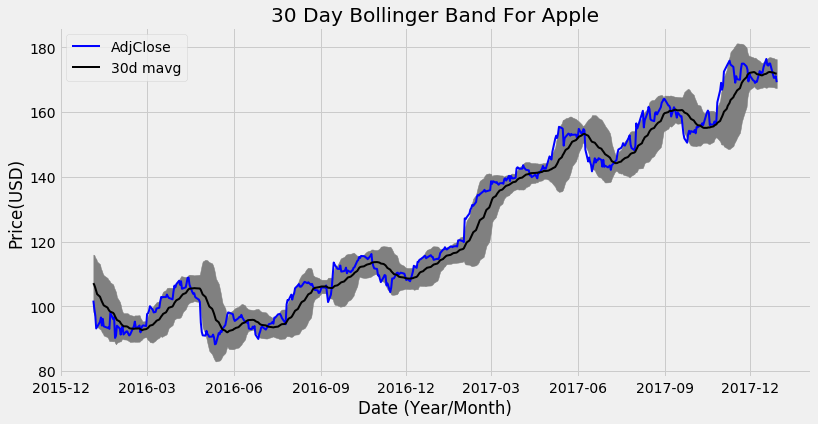

In [7]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df2['2016':].index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, df2['2016':]['Upper Band'], df2['2016':]['Lower Band'], color='grey')

ax.plot(x_axis, df2['2016':]['AdjClose'], color='blue', lw=2)
ax.plot(x_axis, df2['2016':]['30d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Apple')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();




# Part 3
## Make your code more resuable by converting it to a function

Here I am

    'shading' in the regions between the upper and lower bands
    adding a title, a legend and some labels

The important parts of the python code are

    style - fivethirtyeight
    figsize - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots
    fill_between - shades in areas betrween 2 lines



In [10]:
def plotBollBand(file, securityName, attribute = 'AdjClose', window = 21, start=None, end=None):
    
    
    df = pd.read_csv(filepath_or_buffer=file, 
                 index_col='Date', 
                 parse_dates=True)
    df2 = df.iloc[::-1]
    df = df2

    mavgCol = str(window) + "d mavg"
    stdCol = str(window) + "d std"
    
    df[mavgCol] = df[attribute].rolling(window=window).mean()
    df[stdCol] = df[attribute].rolling(window=window).std()
    df['Upper Band'] = df[mavgCol] + (df[stdCol] * 2)
    df['Lower Band'] = df[mavgCol] - (df[stdCol] * 2)
       
    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    # Get index values for the X axis for the DataFrame
    x_axis = df[start:end].index.get_level_values(0)

    # Plot shaded 21 Day Bollinger Band for Facebook
    ax.fill_between(x_axis, df[start:end]['Upper Band'], df[start:end]['Lower Band'], color='grey')

    ax.plot(x_axis, df[start:end][attribute], color='blue', lw=2)
    ax.plot(x_axis, df[start:end][mavgCol], color='black', lw=2)

    # Set Title & Show the Image
    title = str(window) + ' Day Bollinger Band For ' + securityName
    ax.set_title(title)
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price(USD)')
    ax.legend()
    plt.show()


## Test with Google

For example use the data for google but leave all other inputs as default


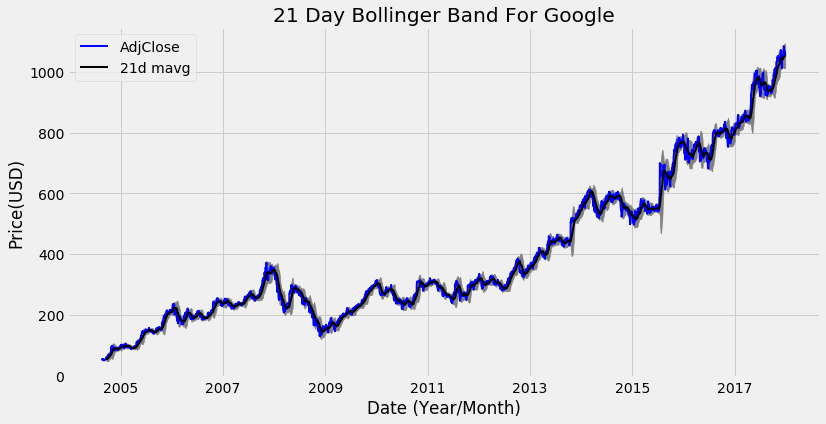

In [11]:
plotBollBand(file='../data/GOOGL.csv', securityName='Google')


## Test with IBM

For example use the data for IBM but only for the period 2014 to 2016


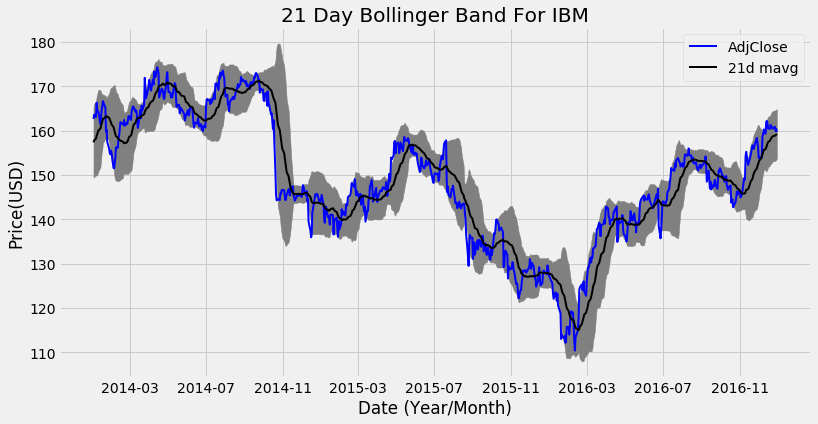

In [12]:
plotBollBand(file='../data/IBM.csv', 
             securityName='IBM', 
             start='2014', 
             end = '2016')


## Test with Facebook

For example use the data for Facebook but with the following parameters

    start 2014
    end - default
    a 42 day rolling average
    use the Adjusted Volume colum



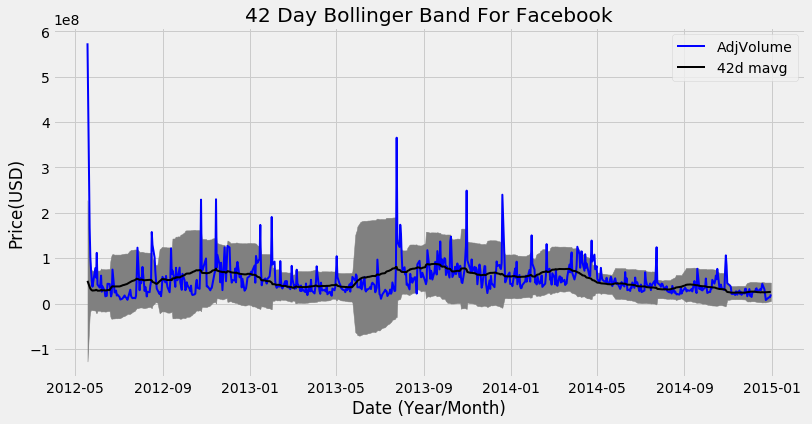

In [19]:
plotBollBand(file='../data/FB.csv', 
             securityName='Facebook', 
             start='2014', 
             window=42,
             attribute = 'AdjVolume')